https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8

https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c

In [48]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [49]:
df0 = pd.read_csv( 'https://raw.githubusercontent.com/janeyin600/Machine_learning_projects/master/adult_income_predictions/data/income_data.csv' )


In [50]:
df = df0.sample( frac = 0.33 , random_state = 999 )

# [ 01 ] Data exploration

In [51]:
df.head( 5 )

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
77,69,Self-emp-inc,174379,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,<=50K
30807,48,Private,101299,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
23838,28,Self-emp-not-inc,190836,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
24124,42,Local-gov,222596,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
22731,21,Private,194096,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [52]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [53]:
df.shape

(16118, 15)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16118 entries, 77 to 43707
Data columns (total 15 columns):
age                16118 non-null int64
workclass          16118 non-null object
fnlwgt             16118 non-null int64
education          16118 non-null object
educational-num    16118 non-null int64
marital-status     16118 non-null object
occupation         16118 non-null object
relationship       16118 non-null object
race               16118 non-null object
gender             16118 non-null object
capital-gain       16118 non-null int64
capital-loss       16118 non-null int64
hours-per-week     16118 non-null int64
native-country     16118 non-null object
income             16118 non-null object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB


In [55]:
df.groupby( 'income' ).size()

income
<=50K    12286
>50K      3832
dtype: int64

In [56]:
df.groupby( 'occupation' ).size()

occupation
?                     891
Adm-clerical         1881
Armed-Forces            6
Craft-repair         2050
Exec-managerial      1976
Farming-fishing       507
Handlers-cleaners     733
Machine-op-inspct    1044
Other-service        1608
Priv-house-serv        75
Prof-specialty       2012
Protective-serv       316
Sales                1797
Tech-support          476
Transport-moving      746
dtype: int64

income
<=50K    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
>50K     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

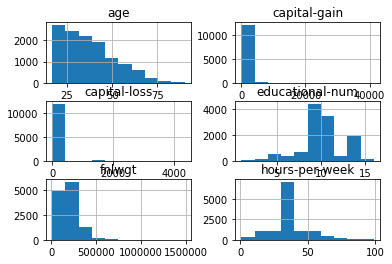

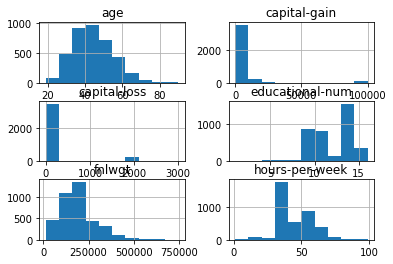

In [57]:
df.groupby( 'income' ).hist( )

# [ 02 ] Data cleaning

In [58]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [59]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# [ 03 ] Feature Engineering

In [60]:
df.replace( { 'income': { '<=50K' : 0 , '>50K' : 1 } } , inplace = True )

In [61]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [62]:
ctg_col = df.select_dtypes( include = [ object ] ).columns.tolist( )

print( ctg_col )

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [63]:
tsf = ColumnTransformer( [ ( 'encoder_01' , OneHotEncoder() , ctg_col ) ] , remainder = 'passthrough' , sparse_threshold = 0 )

In [64]:
ary_tsf = tsf.fit_transform( df )

In [65]:
ary_tsf

array([[ 0.,  0.,  0., ...,  0., 30.,  0.],
       [ 0.,  0.,  0., ...,  0., 40.,  1.],
       [ 0.,  0.,  0., ...,  0., 50.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0., 55.,  0.],
       [ 0.,  0.,  0., ...,  0., 30.,  0.],
       [ 1.,  0.,  0., ...,  0., 25.,  0.]])

In [66]:
# Nom d'une nouvelle colonne : <nom d'origine<_<valeur>

new_cols = []

for col in ctg_col :
    
    new_cols = new_cols + [ col + '_' + val for val in df[ col ].unique() ]

print( new_cols )

['workclass_Self-emp-inc', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_Local-gov', 'workclass_State-gov', 'workclass_?', 'workclass_Federal-gov', 'workclass_Without-pay', 'workclass_Never-worked', 'education_HS-grad', 'education_Some-college', 'education_Bachelors', 'education_Prof-school', 'education_11th', 'education_7th-8th', 'education_10th', 'education_5th-6th', 'education_Assoc-voc', 'education_Assoc-acdm', 'education_Masters', 'education_9th', 'education_Doctorate', 'education_1st-4th', 'education_12th', 'education_Preschool', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'marital-status_Divorced', 'marital-status_Separated', 'marital-status_Widowed', 'marital-status_Married-spouse-absent', 'marital-status_Married-AF-spouse', 'occupation_Sales', 'occupation_Craft-repair', 'occupation_Other-service', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'occupation_Machine-op-inspct', 'occupation_Transport-moving', 'occupation_Adm-cle

In [67]:
all_cols = list( df.columns )

print( all_cols )

['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [68]:
for col in ctg_col :
    
    all_cols.remove( col )

print( all_cols )

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


In [69]:
new_all_cols = new_cols + all_cols

print( new_all_cols )

['workclass_Self-emp-inc', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_Local-gov', 'workclass_State-gov', 'workclass_?', 'workclass_Federal-gov', 'workclass_Without-pay', 'workclass_Never-worked', 'education_HS-grad', 'education_Some-college', 'education_Bachelors', 'education_Prof-school', 'education_11th', 'education_7th-8th', 'education_10th', 'education_5th-6th', 'education_Assoc-voc', 'education_Assoc-acdm', 'education_Masters', 'education_9th', 'education_Doctorate', 'education_1st-4th', 'education_12th', 'education_Preschool', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'marital-status_Divorced', 'marital-status_Separated', 'marital-status_Widowed', 'marital-status_Married-spouse-absent', 'marital-status_Married-AF-spouse', 'occupation_Sales', 'occupation_Craft-repair', 'occupation_Other-service', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'occupation_Machine-op-inspct', 'occupation_Transport-moving', 'occupation_Adm-cle

In [70]:
df_tsf = pd.DataFrame( data = ary_tsf , columns = new_all_cols )

df_tsf.head()

,workclass_Self-emp-inc,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_State-gov,workclass_?,workclass_Federal-gov,workclass_Without-pay,workclass_Never-worked,education_HS-grad,...,native-country_Scotland,native-country_Yugoslavia,native-country_Cambodia,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,69.0,174379.0,9.0,0.0,0.0,30.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,48.0,101299.0,9.0,0.0,0.0,40.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,28.0,190836.0,9.0,0.0,0.0,50.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,42.0,222596.0,9.0,0.0,0.0,40.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,21.0,194096.0,10.0,0.0,0.0,40.0,0.0


In [71]:
X_col = df_tsf.columns.to_list()

X_col.remove( 'income' )

X = df_tsf[ X_col ]

y = df_tsf[ 'income' ]

# [ 04 ] Model Selection

In [25]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [31]:
mdls = []

mdls.append( ('KNN', KNeighborsClassifier() ) )

mdls.append( ('SVC', SVC( gamma = 'scale' ) ) )

mdls.append( ('LR', LogisticRegression( solver = 'lbfgs' ) ) )

mdls.append( ('DT', DecisionTreeClassifier() ) )
 
mdls.append( ('GNB', GaussianNB() ) )

mdls.append( ('RF', RandomForestClassifier( n_estimators = 100 ) ) )

mdls.append( ('GB', GradientBoostingClassifier() ) )

In [32]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [33]:
X_train , X_test , y_train , y_test = train_test_split( X , y , stratify = df[ 'income' ] , random_state = 0 )

In [34]:
names = []

scores = []

for name , mdl in mdls :
    
    mdl.fit( X_train , y_train )
    
    y_pred = mdl.predict( X_test )
    
    scores.append( accuracy_score( y_test , y_pred ) )
    
    names.append( name )
    
tr_split = pd.DataFrame( {'mdl': names , 'score': scores } )

print( tr_split )

   mdl     score
0  KNN  0.777086
1  SVC  0.797641
2   LR  0.796659
3   DT  0.819098
4  GNB  0.793629
5   RF  0.855704
6   GB  0.866350


In [35]:
print( 'best model : {0} with score : {1}'.format( tr_split.loc[ tr_split[ 'score' ].idxmax() , : ][0] , 
                                                   tr_split.loc[ tr_split[ 'score' ].idxmax() , : ][1] ) )

best model : GB with score : 0.8663500122840062


# [ 05 ] Cross validation

In [40]:
from sklearn.model_selection import StratifiedKFold

In [42]:
names = []

scores = []

for name , mdl in mdls :
    
    skf = StratifiedKFold( n_splits = 5 , random_state = 999 ) 
    score = cross_val_score( mdl , X , y , cv = skf , scoring = 'accuracy' ).mean()
    
    names.append( name )
    scores.append( score )
    
skf_cv = pd.DataFrame( { 'Name': names , 'Score' : scores } )

print( skf_cv )

KeyboardInterrupt: 

In [ ]:
axis = sns.barplot( x = 'Name' , y = 'Score' , data = skf_ccv )

axis.set( xlabel = 'Classifier' , ylabel = 'Accuracy' )

for p in axis.patches:
    
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha = 'center' ) 
    
plt.show()

# [ 06 ] Feature Selection

In [72]:
from sklearn.feature_selection import RFECV

In [73]:
gb_mdl = GradientBoostingClassifier()

In [74]:
skf = StratifiedKFold( n_splits = 5 , random_state = 999 )

gb_rfecv = RFECV( estimator = gb_mdl , step = 1 , cv = skf , scoring = 'accuracy' )

gb_rfecv.fit( X , y )

RFECV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=False),
   estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

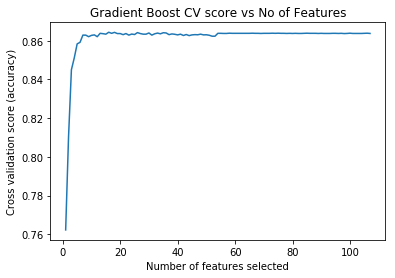

In [77]:
plt.figure()

plt.title( 'Gradient Boost CV score vs No of Features' )

plt.xlabel( "Number of features selected" )

plt.ylabel( "Cross validation score (accuracy)" )

plt.plot( range( 1 , len( gb_rfecv.grid_scores_ ) + 1 ) , gb_rfecv.grid_scores_ )

plt.show()

In [78]:
print( gb_rfecv.support_ )

[False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
  True  True False False  True False  True False False False False False
 False False False False  True False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True]


In [83]:
feature_importance = list( zip( X_col , gb_rfecv.support_ ) )

print( feature_importance )

X_col_new = []

for key , value in enumerate( feature_importance ) :
    
    if( value[1] ) == True :
        X_col_new.append( value[0] )
        
print( X_col_new )

[('workclass_Self-emp-inc', False), ('workclass_Private', False), ('workclass_Self-emp-not-inc', False), ('workclass_Local-gov', False), ('workclass_State-gov', False), ('workclass_?', True), ('workclass_Federal-gov', True), ('workclass_Without-pay', False), ('workclass_Never-worked', False), ('education_HS-grad', False), ('education_Some-college', False), ('education_Bachelors', False), ('education_Prof-school', False), ('education_11th', False), ('education_7th-8th', False), ('education_10th', False), ('education_5th-6th', False), ('education_Assoc-voc', False), ('education_Assoc-acdm', False), ('education_Masters', False), ('education_9th', False), ('education_Doctorate', False), ('education_1st-4th', False), ('education_12th', False), ('education_Preschool', False), ('marital-status_Married-civ-spouse', False), ('marital-status_Never-married', False), ('marital-status_Divorced', True), ('marital-status_Separated', False), ('marital-status_Widowed', False), ('marital-status_Married-

In [84]:
X_new = df_tsf[ X_col_new ]

In [85]:
initial_score = cross_val_score( gb_mdl , X , y , cv = skf , scoring='accuracy' ).mean()

print( 'Initial accuracy : {0}'.format( initial_score ) )

Initial accuracy : 0.8637541533764072


In [87]:
new_score = cross_val_score( gb_mdl , X_new , y , cv = skf , scoring = 'accuracy' ).mean()

print( 'Accuracy after Feature Selection : {0}'.format( new_score ) )

Accuracy after Feature Selection : 0.8644366317121657


# [ 07 ] Model Parameter Tuning

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
gb_mdl = GradientBoostingClassifier()

In [90]:
skf = StratifiedKFold( n_splits = 5 , random_state = 999 ) 

In [96]:
param_distrib = { 'loss' : [ 'deviance' , 'exponential' ] ,
                    'n_estimators' : [ 10 , 100 , 500 ] , 
                    'subsample' : [ 0.5 , 1 ] } 

In [97]:
grid = RandomizedSearchCV( gb_mdl , param_distrib , cv = skf , scoring = 'accuracy' )

grid.fit( X_new , y )

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=999, shuffle=False),
          error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'loss': ['deviance', 'exponential'], 'n_estimators': [10, 100, 500], 'subsample': [0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [98]:
print( grid.best_params_ )

{'subsample': 1, 'n_estimators': 500, 'loss': 'exponential'}


In [99]:
print( grid.best_estimator_ )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)


In [101]:
gb_mdl_new = GradientBoostingClassifier( subsample = 1 , n_estimators = 500 , loss = 'exponential' )

In [102]:
initial_score = cross_val_score( gb_mdl , X , y , cv = skf , scoring = 'accuracy' ).mean()

print( 'Initial accuracy : {0}'.format( initial_score ) )

Initial accuracy : 0.8637541533764072


In [104]:
new_score = cross_val_score( gb_mdl_new , X_new , y , cv = skf , scoring = 'accuracy' ).mean()

print( 'Accuracy after Feature Selection : {0}'.format( new_score ) )

Accuracy after Feature Selection : 0.8672902106227767
